## Data Challenge 3

### Shujian Liu, Insight Data Fellow

In [1]:
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import math
import pandas as pd
import seaborn as sns
sns.set(style="ticks")
import sklearn.metrics
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

import pandas as pd

### Load data and clean

In [2]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


### Data virtulization

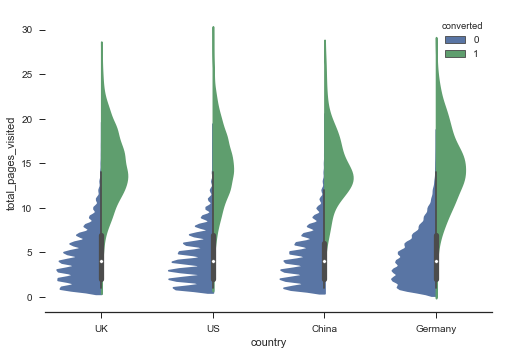

In [4]:
sns.violinplot(x="country", y="total_pages_visited", hue="converted", data=df, split=True)
sns.despine(left=True)

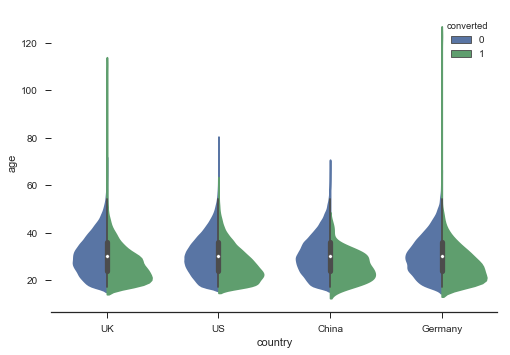

In [5]:
sns.violinplot(x="country", y="age", hue="converted", data=df, split=True)
sns.despine(left=True)

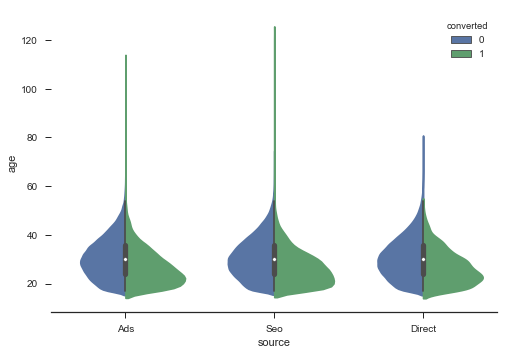

In [6]:
sns.violinplot(x="source", y="age", hue="converted", data=df, split=True)
sns.despine(left=True)

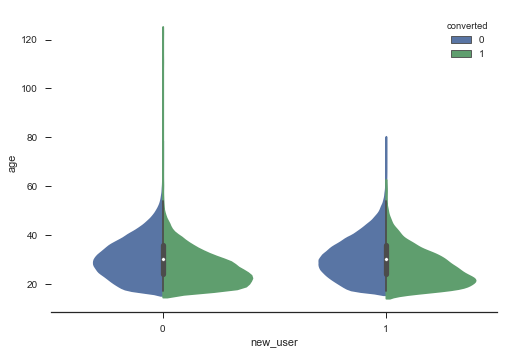

In [7]:
sns.violinplot(x="new_user", y="age", hue="converted", data=df, split=True)
sns.despine(left=True)

In [8]:
cols_to_transform = ['country', 'source']
df_with_dummies = pd.get_dummies(df, columns = cols_to_transform)

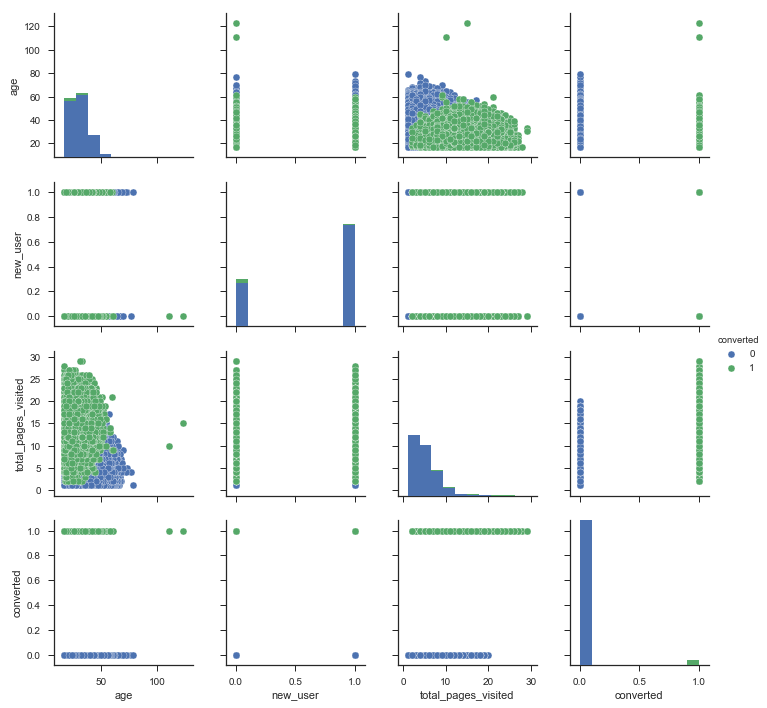

In [9]:
columns_to_display = ['age', 'new_user', 'total_pages_visited', 'converted']
sns.pairplot(df_with_dummies[columns_to_display], hue="converted")

### Machine learning with random forest

In [10]:
x = df_with_dummies.copy().drop(['converted'], axis=1)
y = df_with_dummies['converted']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=2017)

clf = RandomForestClassifier()
model = clf.fit(x_train, y_train)

y_pred = clf.predict(x_valid)

print(classification_report(y_valid, y_pred, target_names=['0', '1']))

# http://www.markhneedham.com/blog/2017/06/16/scikit-learn-random-forests-feature-importance/
headers = ["name", "score"]
values = sorted(zip(x.columns, model.feature_importances_), key=lambda x: x[1] * -1)

print('')
print('Feature Importance :')
for value in values:
    print(value)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     91818
          1       0.82      0.66      0.73      3042

avg / total       0.98      0.98      0.98     94860


Feature Importance :
('total_pages_visited', 0.81417532372417889)
('age', 0.11411099365976492)
('new_user', 0.038751088794631239)
('country_China', 0.01739731546184544)
('country_UK', 0.0052930584839113535)
('country_US', 0.00334062343724456)
('source_Ads', 0.0019541515551523094)
('source_Direct', 0.0017687377095833017)
('source_Seo', 0.0016160697446159322)
('country_Germany', 0.0015926374290723137)


### Discussions:

1. People visisted more tend to be easily converted. This is shown both by the plot and feature importance in RF.

2. Age is the second important feature. Younger people, esp. ~ 20, are more easily converted.

3. Whether it is new user, or country and scource have minimal influence on the model.